# Analysis of Gun-related deaths in the US

For this analysis we will be using a dataset "guns.csv" from FiveThirtyEight and can be found at (https://github.com/fivethirtyeight/guns-data). It contains information on gun deaths in the US from 2012 to 2014. Each row in the dataset represents a single fatality. The columns contain demographic and other information about the victim.

In [1]:
import csv
file = open("guns.csv")
data = list(csv.reader(file))

#First 5 rows of data
print(data[:5])

[['', 'year', 'month', 'intent', 'police', 'sex', 'age', 'race', 'hispanic', 'place', 'education'], ['1', '2012', '01', 'Suicide', '0', 'M', '34', 'Asian/Pacific Islander', '100', 'Home', '4'], ['2', '2012', '01', 'Suicide', '0', 'F', '21', 'White', '100', 'Street', '3'], ['3', '2012', '01', 'Suicide', '0', 'M', '60', 'White', '100', 'Other specified', '4'], ['4', '2012', '02', 'Suicide', '0', 'M', '64', 'White', '100', 'Home', '4']]


In [2]:
#Separating header and data
headers = data[0]
data = data[1:]

print(headers)
print(data[:5])

['', 'year', 'month', 'intent', 'police', 'sex', 'age', 'race', 'hispanic', 'place', 'education']
[['1', '2012', '01', 'Suicide', '0', 'M', '34', 'Asian/Pacific Islander', '100', 'Home', '4'], ['2', '2012', '01', 'Suicide', '0', 'F', '21', 'White', '100', 'Street', '3'], ['3', '2012', '01', 'Suicide', '0', 'M', '60', 'White', '100', 'Other specified', '4'], ['4', '2012', '02', 'Suicide', '0', 'M', '64', 'White', '100', 'Home', '4'], ['5', '2012', '02', 'Suicide', '0', 'M', '31', 'White', '100', 'Other specified', '2']]


In [3]:
# Counting no. of deaths during each year
years = [row[1] for row in data]

year_counts = {}

for year in years:
    if year in year_counts:
        year_counts[year] += 1
    else:
        year_counts[year] = 1
        
print(year_counts)

{'2012': 33563, '2013': 33636, '2014': 33599}


It seems that number of deaths do not vary much between each year, so we will analyse the death count per month.

In [4]:
import datetime
dates = [datetime.datetime(year=int(row[1]), month=int(row[2]), day=1) for row in data]
date_counts = {}

for date in dates:
    if date in date_counts:
        date_counts[date] += 1
    else:
        date_counts[date] = 1
        
print(date_counts)

{datetime.datetime(2012, 1, 1, 0, 0): 2758, datetime.datetime(2012, 2, 1, 0, 0): 2357, datetime.datetime(2012, 3, 1, 0, 0): 2743, datetime.datetime(2012, 4, 1, 0, 0): 2795, datetime.datetime(2012, 5, 1, 0, 0): 2999, datetime.datetime(2012, 6, 1, 0, 0): 2826, datetime.datetime(2012, 7, 1, 0, 0): 3026, datetime.datetime(2012, 8, 1, 0, 0): 2954, datetime.datetime(2012, 9, 1, 0, 0): 2852, datetime.datetime(2012, 10, 1, 0, 0): 2733, datetime.datetime(2012, 11, 1, 0, 0): 2729, datetime.datetime(2012, 12, 1, 0, 0): 2791, datetime.datetime(2013, 1, 1, 0, 0): 2864, datetime.datetime(2013, 2, 1, 0, 0): 2375, datetime.datetime(2013, 3, 1, 0, 0): 2862, datetime.datetime(2013, 4, 1, 0, 0): 2798, datetime.datetime(2013, 5, 1, 0, 0): 2806, datetime.datetime(2013, 6, 1, 0, 0): 2920, datetime.datetime(2013, 7, 1, 0, 0): 3079, datetime.datetime(2013, 8, 1, 0, 0): 2859, datetime.datetime(2013, 9, 1, 0, 0): 2742, datetime.datetime(2013, 10, 1, 0, 0): 2808, datetime.datetime(2013, 11, 1, 0, 0): 2758, datet

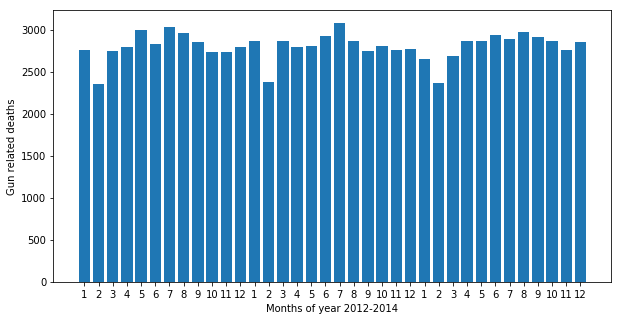

In [57]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

months = list(np.arange(1, 13))*3

plt.figure(figsize=(10,5))
plt.bar(range(len(date_counts)), list(date_counts.values()), align='center')
plt.xticks(range(len(date_counts)), list(months))
plt.xlabel("Months of year 2012-2014")
plt.ylabel("Gun related deaths")

plt.show()

Looks like there is some periodicity in gun related deaths. The maximum each year seems to be achieved during July.

In [72]:
def counter(col_idx):
    """
    This function counts the number of unique items in a given column.
    
    Parameter: col_idx - column index number
    Return:    counts - a dictionary of counts
    """
    column = [row[col_idx] for row in data]

    counts = {}

    for item in column:
        if item in counts:
            counts[item] += 1
        else:
            counts[item] = 1
        
    return(counts)

In [9]:
sex_counts = counter(5)
race_counts = counter(7)

print(sex_counts)
print(race_counts)

{'M': 86349, 'F': 14449}
{'Hispanic': 9022, 'Asian/Pacific Islander': 1326, 'Black': 23296, 'White': 66237, 'Native American/Native Alaskan': 917}


## So far:

- The gun-related death count does not seem to vary yearly between 2012-2014.
- The death count varies in between months.
- Death count amongst males is much higher than females.
- Death count seems to vary with race as well but to better understand this, we need to calculate death rate as the population of these racial groups vary as well.

In [11]:
file = open("census.csv")
census = list(csv.reader(file))

print(census)

[['Id', 'Year', 'Id', 'Sex', 'Id', 'Hispanic Origin', 'Id', 'Id2', 'Geography', 'Total', 'Race Alone - White', 'Race Alone - Hispanic', 'Race Alone - Black or African American', 'Race Alone - American Indian and Alaska Native', 'Race Alone - Asian', 'Race Alone - Native Hawaiian and Other Pacific Islander', 'Two or More Races'], ['cen42010', 'April 1, 2010 Census', 'totsex', 'Both Sexes', 'tothisp', 'Total', '0100000US', '', 'United States', '308745538', '197318956', '44618105', '40250635', '3739506', '15159516', '674625', '6984195']]


In [12]:
mapping = {
    'Hispanic': 44618105,
    'Asian/Pacific Islander': 15159516+674625,
    'Black': 40250635,
    'White': 197318956,
    'Native American/Native Alaskan': 3739506
}

In [14]:
race_per_hundredk = {}

for race, count in race_counts.items():
    race_per_hundredk[race] = (count/mapping[race])*100000
    
print(race_per_hundredk)

{'Hispanic': 20.220491210910907, 'Asian/Pacific Islander': 8.374309664161762, 'Black': 57.8773477735196, 'White': 33.56849303419181, 'Native American/Native Alaskan': 24.521955573811088}


In [18]:
intents = [row[3] for row in data]
races = [row[7] for row in data]

homicide_race_counts = {}

for i, race in enumerate(races):
    if intents[i] == "Homicide":
        if race in homicide_race_counts:
            homicide_race_counts[race] += 1
        else:
            homicide_race_counts[race] = 1
            
print(homicide_race_counts)

{'Hispanic': 5634, 'White': 9147, 'Black': 19510, 'Asian/Pacific Islander': 559, 'Native American/Native Alaskan': 326}


In [19]:
homicide_race_counts_per_hundredk = {}

for race, count in homicide_race_counts.items():
    homicide_race_counts_per_hundredk[race] = (count/mapping[race])*100000
    
print(homicide_race_counts_per_hundredk)

{'Hispanic': 12.627161104219914, 'White': 4.6356417981453335, 'Black': 48.471284987180944, 'Asian/Pacific Islander': 3.530346230970155, 'Native American/Native Alaskan': 8.717729026240365}


- Homicide related gun death rate is significantly higher amongst Blacks.
- For further analysis, we can find out correlation between other variables such as, between months and homicide rate, homicide rate and gender, other intents and gender/race, location, etc.

### Relationship between death count, location and education

In [75]:
place_count = counter(9)

del place_count['NA']
print(place_count)

{'Home': 60486, 'Street': 11151, 'Other specified': 13751, 'Other unspecified': 8867, 'Trade/service area': 3439, 'Farm': 470, 'Industrial/construction': 248, 'School/instiution': 671, 'Sports': 128, 'Residential institution': 203}


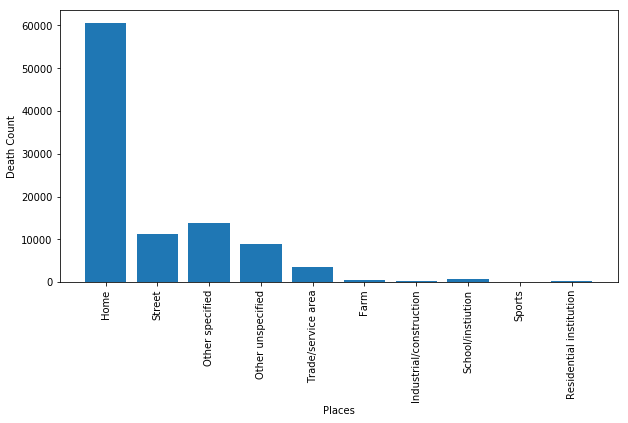

In [77]:
plt.figure(figsize=(10,5))
plt.bar(range(len(place_count)), list(place_count.values()), align='center')
plt.xticks(range(len(place_count)), list(place_count.keys()), rotation=90)
plt.xlabel("Places")
plt.ylabel("Death Count")

plt.show()

In [76]:
ed_count = counter(10)
del ed_count['NA']
print(ed_count)

{'4': 12946, '3': 21680, '2': 42927, '1': 21823, '5': 1369}


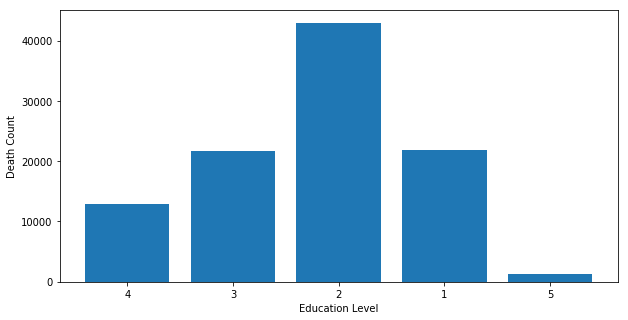

In [78]:
plt.figure(figsize=(10,5))
plt.bar(range(len(ed_count)), list(ed_count.values()), align='center')
plt.xticks(range(len(ed_count)), list(ed_count.keys()))
plt.xlabel("Education Level")
plt.ylabel("Death Count")

plt.show()

- 1 -- Less than High School
- 2 -- Graduated from High School or equivalent
- 3 -- Some College
- 4 -- At least graduated from College
- 5 -- Not available

It seems that most gun related deaths occured in private spaces like home and most crimes were comitted by people with low education levels. As the level of education increases, the death count decreases.